In [60]:

import warnings
warnings.filterwarnings('ignore')

In [61]:
#importing required libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [63]:
# loading the data

In [64]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df=df.replace(to_replace = 1,value = 1)
df=df.replace(to_replace = 2,value = 0)
df=df.replace(to_replace = 'Female',value = 0)
df=df.replace(to_replace = 'Male',value = 1)
df.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,0.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [65]:
#features of the dataset

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null int64
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [67]:
#dimensions of the dataset

In [68]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  583
Number of columns in the dataset:  11


In [69]:
#checking for any null values

In [70]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [71]:
#we replace the null data with 0

In [72]:
df = df.fillna(0)

In [73]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [74]:
df.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.271355,1.475815,290.576329,80.713551,109.910806,6.483190,3.069811,0.940566,0.713551
std,16.189833,0.429603,6.219630,2.810263,242.937989,182.620356,288.918529,1.085451,0.967876,0.327962,0.452490
min,4.000000,0.000000,0.000000,0.000000,63.000000,10.000000,10.000000,2.700000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,1.000000,2.600000,1.200000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [75]:

#The features described in the above data set are:
#1. Count tells us the number of NoN-empty rows in a feature.
#2. Mean tells us the mean value of that feature.
#3. Std tells us the Standard Deviation Value of that feature.
#4. Min tells us the minimum value of that feature.
#5. 25%, 50%, and 75% are the percentile/quartile of each features.
#6. Max tells us the maximum value of that feature.

In [76]:
#Checking features of various attributes

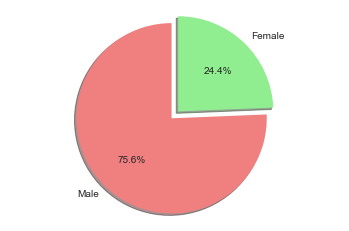

In [77]:
male = df['gender'] == 1
male = list(male)
male = list(filter(lambda a: a != False, male))
male = len(male)

female = df['gender'] == 0
female = list(filter(lambda a: a != False, female))
female = len(female)
gen = [male,female]
label = ['Male','Female']
colours = ['lightcoral','lightgreen']
explode = (0.1, 0)

plt.pie(gen , labels = label , colors = colours , shadow = True, autopct='%1.1f%%' , explode = explode , startangle = 90)
plt.axis('equal')
plt.show()

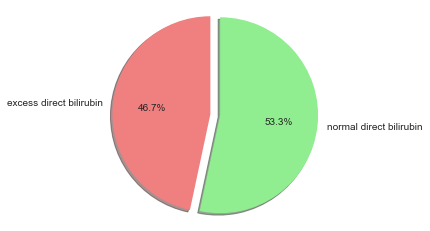

In [78]:
excess_direct_bilirubin = df['direct_bilirubin'] > 0.3
excess_direct_bilirubin = list(filter(lambda a: a != False,excess_direct_bilirubin ))
excess_direct_bilirubin = len(excess_direct_bilirubin)


normal_direct_bilirubin = df['direct_bilirubin'] <= 0.3
normal_direct_bilirubin = list(filter(lambda a: a != False,normal_direct_bilirubin ))
normal_direct_bilirubin = len(normal_direct_bilirubin)


di_bilirubin = [excess_direct_bilirubin,normal_direct_bilirubin]
label = ['excess direct bilirubin','normal direct bilirubin']
colours = ['lightcoral','lightgreen']
explode = (0.1, 0)

plt.pie(di_bilirubin , labels = label , colors = colours , shadow = True, autopct='%1.1f%%' , explode = explode , startangle = 90)
plt.axis('equal')
plt.show()


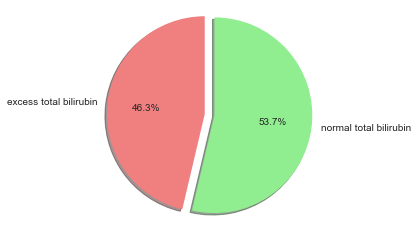

In [79]:
excess_total_bilirubin = df['tot_bilirubin'] > 1.0
excess_total_bilirubin = list(filter(lambda a: a != False,excess_total_bilirubin ))
excess_total_bilirubin = len(excess_total_bilirubin)


normal_total_bilirubin = df['tot_bilirubin'] <= 1.0
normal_total_bilirubin = list(filter(lambda a: a != False,normal_total_bilirubin ))
normal_total_bilirubin = len(normal_total_bilirubin)


tot_bilirubin = [excess_total_bilirubin,normal_total_bilirubin]
label = ['excess total bilirubin','normal total bilirubin']
colours = ['lightcoral','lightgreen']
explode = (0.1, 0)

plt.pie(tot_bilirubin , labels = label , colors = colours , shadow = True, autopct='%1.1f%%' , explode = explode , startangle = 90)
plt.axis('equal')
plt.show()

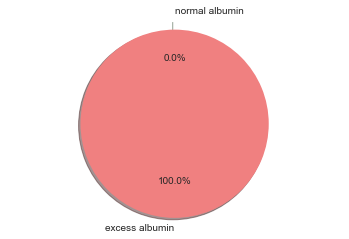

In [80]:
excess_albumin = df['albumin'] > 5.4
excess_albumin = list(filter(lambda a: a != False, excess_albumin ))
excess_albumin = len(excess_albumin)


normal_albumin = df['albumin'] <= 5.4
normal_albumin = list(filter(lambda a: a != False,normal_albumin ))
normal_albumin = len(normal_albumin)


tot_albumin = [excess_albumin,normal_albumin]
label = ['excess albumin','normal albumin']
colours = ['lightcoral','lightgreen']
explode = (0.1, 0)

plt.pie(tot_albumin , labels = label , colors = colours , shadow = True, autopct='%1.1f%%' , explode = explode , startangle = 90)
plt.axis('equal')
plt.show()

In [81]:
#exploratry data analysis

In [82]:
sns.set_style('whitegrid')

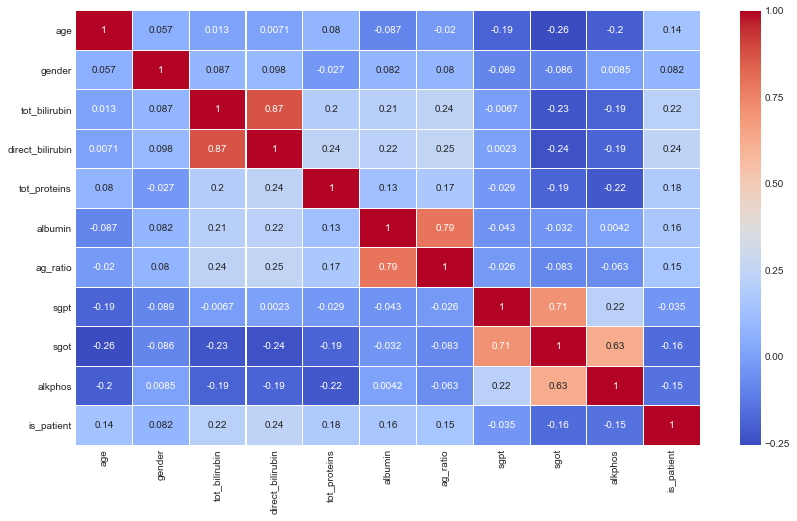

In [83]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [84]:
#plotting distribution of various attributes

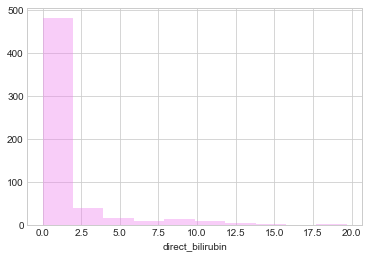

In [85]:
sns.distplot(df['direct_bilirubin'],kde=False,bins=10,color='violet')

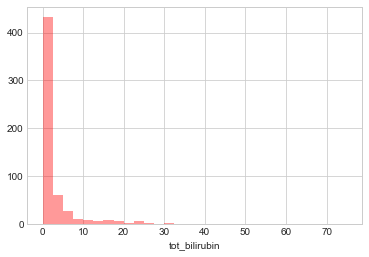

In [86]:

sns.distplot(df['tot_bilirubin'],kde=False,bins=30,color='red')
plt.show()

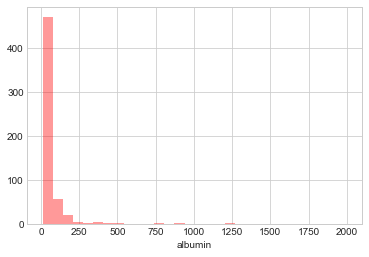

In [87]:

sns.distplot(df['albumin'],kde=False,bins=30,color='red')
plt.show()

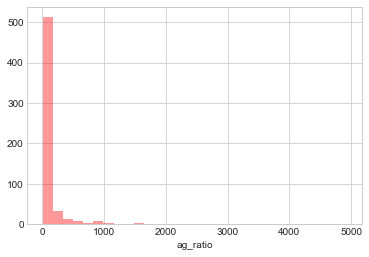

In [88]:

sns.distplot(df['ag_ratio'],kde=False,bins=30,color='red')
plt.show()

In [89]:
# scatter plot 

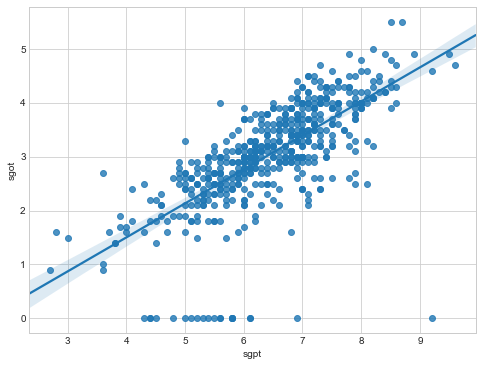

In [90]:
plt.figure(figsize=(8,6))
sns.regplot(x='sgpt',y='sgot',data=df)
plt.show()

In [91]:
#Splitting the data into traning and test

In [92]:
X= df.drop('is_patient',axis=1)
y=df['is_patient']

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [94]:
#Preprocessing - Scaling the features

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [97]:
# implementing GridSearchCv to select best parameters and applying k-NN Algorithm

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}

In [99]:
model = GridSearchCV(knn,params,cv=10)

In [100]:
model.fit(X_train,y_train)
model.best_params_    

{'n_neighbors': 31}

In [101]:
#making prediction

In [102]:
predict = model.predict(X_test)

In [103]:
# checking accuracy

In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix

print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.7428571428571429
Using k-NN we get an accuracy score of:  74.286 %


In [105]:
# Confusion Matrix

NameError: name 'cnf_matrix' is not defined

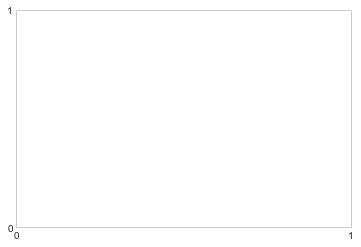

In [106]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# classification report

In [108]:
from sklearn.metrics import classification_report#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

In [109]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.60      0.13      0.21        47
          1       0.75      0.97      0.85       128

avg / total       0.71      0.74      0.68       175



In [110]:
# Receiver Operating Characterstic(ROC) Curve

In [111]:
from sklearn.metrics import roc_auc_score,roc_curve

In [112]:
#Get predicted probabilites from the model
y_probabilities = model.predict_proba(X_test)[:,1]

In [113]:
#Create true and false positive rates
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,y_probabilities)

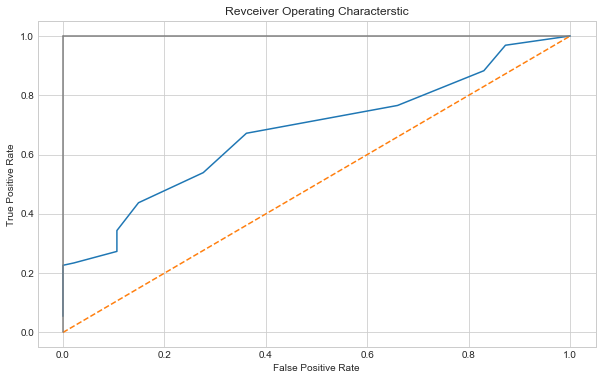

In [114]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [115]:
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.6764461436170213